# Assignment 4.2 - ( 3.1, 3.2, 4.1, 4.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Exercies 5-1
In the BRFSS (see “The lognormal Distribution” on page 55), the distribution of heights
is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163
cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male and between 5′10″ and 6′1″ tall.
What percentage of the US male population is in this range? Hint: use
scipy.stats.norm.cdf.

In [63]:
import thinkstats2 as ts
import thinkplot as tp
import numpy as np
import brfss
import scipy

In [84]:
# creates data frame of heights
df = brfss.ReadBrfss()
# normal distribution of male heights
stats = scipy.stats.norm(178, 7.7)
# eval CDF of low BMG height
low = stats.cdf(177.8)
# eval CDF of high BMG height
high = stats.cdf(185.4)
# prints percentage of US male pop in BMG height range
print(f"% of US male population in Blue Man Group height range: {(high-low)*100}%")

% of US male population in Blue Man Group height range: 34.20946829459531%


## Exercise 5-2
To get a feel for the Pareto distribution, let’s see how different the world would be if the
distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7,
we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction
of the population is shorter than the mean? If there are 7 billion people in Pareto world,
how many do we expect to be taller than 1 km? How tall do we expect the tallest person
to be?

In [65]:
alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)

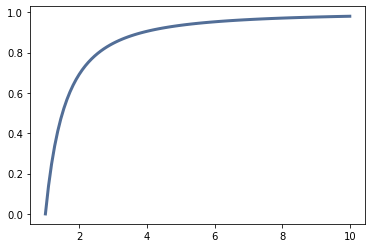

In [66]:
xs, ps = ts.RenderParetoCdf(xmin, alpha, 0, 10, n=100)
tp.Plot(xs, ps)

In [67]:
# mean height
dist.mean()

2.428571428571429

In [68]:
# fraction of people shorter than mean
dist.cdf(dist.mean())

0.778739697565288

In [69]:
# number of people taller than 1km
(1 - dist.cdf(1000)) * 7e9

55602.976430479954

In [70]:
# tallest person's height
dist.ppf(1 - 1 / 7e9)

618349.6106759505

## Exercise 6-1
Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.
What fraction of households reports a taxable income below the mean? How do the
results depend on the assumed upper bound?

In [71]:
import hinc2
import math

In [81]:
def main():
    # data frame of income distribution
    cps_df = hinc2.hinc.ReadData()
    # creates interpolated sample of actual data
    cps_sample = InterpolateSample(cps_df, log_upper=6.0)
    # actual sample income values (no log scale)
    sample = np.power(10, cps_sample)
    # finds mean
    print(f"Mean: {Mean(sample)}")
    print(f"Median: {Median(sample)}")
    print(f"Skewness: {Skewness(sample)}")
    print(f"Pearson Skewness: {PearsonMedianSkewness(sample)}")
    sample_cdf = ts.Cdf(sample)
    print(f"Percentage of households with income below mean: {sample_cdf.Prob(Mean(sample)) * 100}%")

In [82]:
if __name__ == "__main__":
    main()

Mean: 74278.70753118733
Median: 51226.45447894046
Skewness: 4.949920244429583
Pearson Skewness: 0.7361258019141782
Percentage of households with income below mean: 66.0005879566872%


In [74]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    copied from ThinkStats2 repo
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [75]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [76]:
def Mean(xs):
    return RawMoment(xs, 1)

In [77]:
def Median(xs):
    cdf = ts.MakeCdfFromList(xs)
    return cdf.Value(0.5)

In [78]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [79]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [80]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

The assumed upper bound has a large effect on the mean of the sample. Outliers that may lie beyond the given upper bound would shift the mean a fair amount. The skew would likewise be affected but Pearson's Median Skewness would not be as affected. 